In [6]:
def lorenz(t, Xt, sigma = 10, beta = 8/3, rho = 28):
    x, y, z = Xt
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return dx, dy, dz

In [7]:
from scipy.integrate import solve_ivp
import numpy as np
X0 = [1, 1, 1]
tmax = 50
N = 1000
soln = solve_ivp(lorenz, (0, tmax), X0, dense_output = True)

# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, N)
X = soln.sol(t).T
np.save('lorenz.npy', X)

Full 3d system

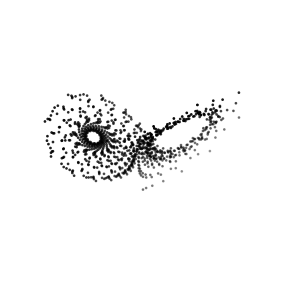

In [17]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.axis('off')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s = 3, color = 'k')

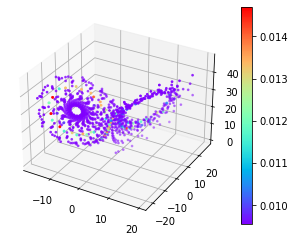

In [6]:
import DVR

DVR.plot_density(X, 2)

Set k =  8
Deprecated parameter. It has been replaced by max_intervals


NameError: name 'plt' is not defined

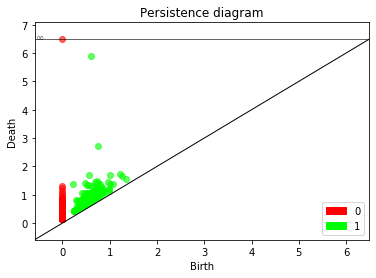

In [6]:
import gudhi as gd
import DVR
import matplotlib.pyplot as plt

dvr = DVR.DVR(2, points = X, max_dimension = 2)
ph = dvr.persistence()

In [12]:
Ph0 = []
Ph1 = []
for x in ph:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenz_dvrcorrected_dim0.npy', Ph0)
np.save('lorenz_dvrcorrected_dim1.npy', Ph1)

Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, 'DVR: Lorenz system, t in [0, 50], 1000 points')

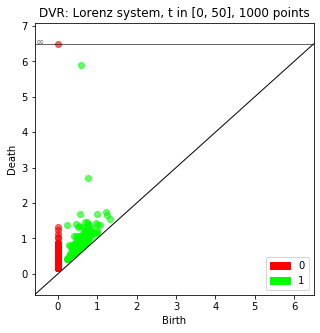

In [10]:
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = ph, legend = True)
plt.title(f"DVR: Lorenz system, t in [0, {tmax}], {N} points")

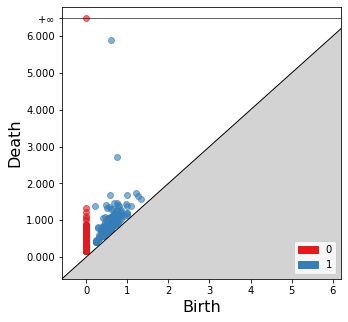

In [8]:
import gudhi as gd

plt.rcParams["figure.figsize"] = (5,5)

ph0 = np.load("lorenz_dvrcorrected_dim0.npy")
ph0 = [(0, (x[0], x[1])) for x in ph0]
ph1 = np.load("lorenz_dvrcorrected_dim1.npy")
ph1 = [(1, (x[0], x[1])) for x in ph1]
ph = ph1+ ph0
gd.plot_persistence_diagram(persistence = ph, legend = True)
plt.title("")
plt.show()

DVR: triweight

Set k =  8
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, '')

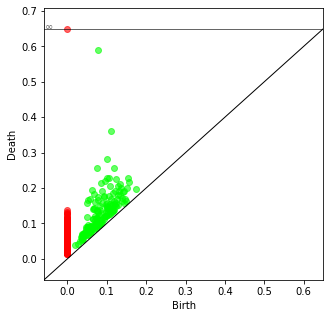

In [9]:
import gudhi as gd

plt.rcParams['figure.figsize'] = (5, 5)
full_triweight = DVR.DVR(1, points = X, kernel = DVR.f_estimator.triweight, max_dimension = 2)
full_triweight_ph = full_triweight.persistence()
gd.plot_persistence_diagram(persistence = full_triweight_ph)
plt.title("")

DVR: Epanechnikov

Set k =  8
Deprecated parameter. It has been replaced by max_intervals


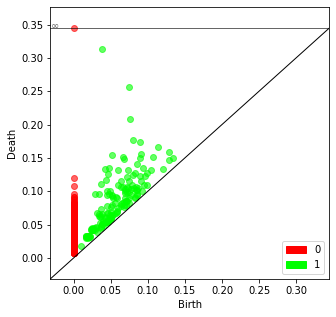

In [8]:
geo_cpx_ep = DVR.DVR(1, points = X, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

Ph0 = []
Ph1 = []
for x in geo_ph_ep:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenz_epan_dim0.npy', Ph0)
np.save('lorenz_epan_dim1.npy', Ph1)

Deprecated parameter. It has been replaced by max_intervals


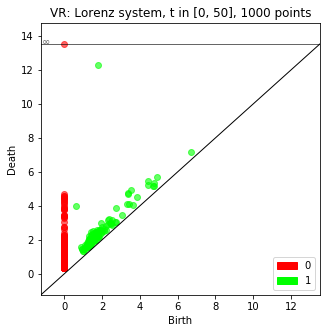

In [9]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title(f"VR: Lorenz system, t in [0, {tmax}], {N} points")
plt.show()

In [14]:
Ph0 = []
Ph1 = []
for x in vr_ph:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenz_vr_dim0.npy', Ph0)
np.save('lorenz_vr_dim1.npy', Ph1)

X shadow manifold

In [ ]:
x_coords = X[:, 0]
x_shadow = np.array([[x, x_coords[i]] for i, x in enumerate(x_coords[1:])])
np.save('lorenz_xshadow.npy', x_shadow)

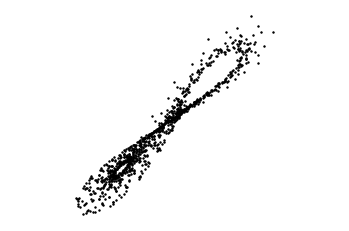

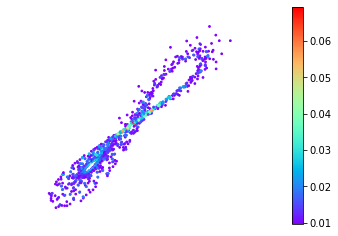

In [3]:
import numpy as np
import DVR
import matplotlib.pyplot as plt

X = np.load('lorenz_xshadow.npy')
plt.axis('equal')
plt.axis('off')
plt.scatter(X[:, 0], X[:, 1], s = 2, color = 'k')
DVR.plot_density(points = X, n = 2)

In [16]:
geoest = DVR.Geodist_estimator(X, 2)
geo_dist = geoest.distance_matrix()
np.save('lorenzshadow_geodistcorrected.npy', geo_dist)

Set k =  10


Deprecated parameter. It has been replaced by max_intervals


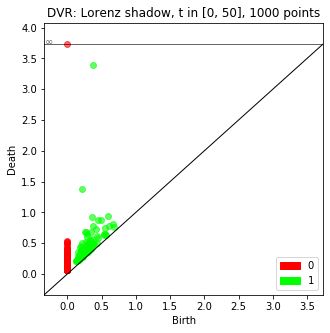

In [17]:
import gudhi as gd
import matplotlib.pyplot as plt

dvr = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
dvr_ph = dvr.persistence()
gd.plot_persistence_diagram(dvr_ph, legend = True)
plt.title("DVR: Lorenz shadow, t in [0, 50], 1000 points")
plt.show()

In [18]:
Ph0 = []
Ph1 = []
for x in dvr_ph:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenzshadow_dvrcorrected_dim0.npy', Ph0)
np.save('lorenzshadow_dvrcorrected_dim1.npy', Ph1)

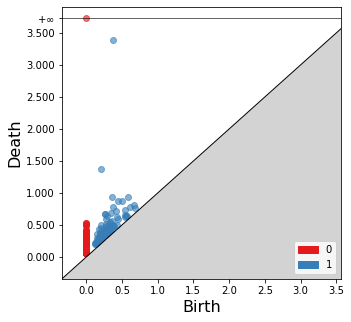

In [11]:
ph0 = np.load("lorenzshadow_dvrcorrected_dim0.npy")
ph0 = [(0, (x[0], x[1])) for x in ph0]
ph1 = np.load("lorenzshadow_dvrcorrected_dim1.npy")
ph1 = [(1, (x[0], x[1])) for x in ph1]
ph = ph1+ ph0
gd.plot_persistence_diagram(persistence = ph, legend = True)
plt.title("")
plt.show()

DVR: triweight kernel

Set k =  10
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, '')

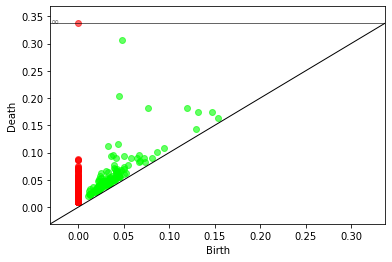

In [3]:
import gudhi as gd

triweight = DVR.DVR(1, points = X, kernel = DVR.f_estimator.triweight, max_dimension = 2)
triweight_ph = triweight.persistence()
gd.plot_persistence_diagram(persistence = triweight_ph)
plt.title("")

In [5]:
Ph0 = []
Ph1 = []
for x in triweight_ph:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenzshadow_triweight_dim0.npy', Ph0)
np.save('lorenzshadow_triweight_dim1.npy', Ph1)

DVR: Epanechnikov kernel

Set k =  10
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, '')

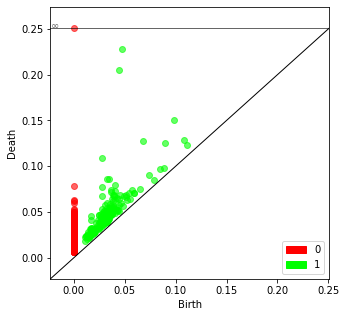

In [4]:
import DVR
import gudhi as gd

geo_cpx_ep = DVR.DVR(1, points = X, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

In [5]:
Ph0 = []
Ph1 = []
for x in geo_ph_ep:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenzshadow_epan_dim0.npy', Ph0)
np.save('lorenzshadow_epan_dim1.npy', Ph1)

Vietoris rips on shadow manifold

In [19]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()

Deprecated parameter. It has been replaced by max_intervals


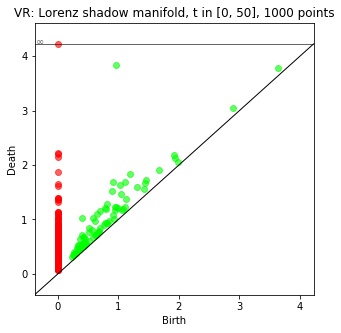

In [20]:
gd.plot_persistence_diagram(vr_ph)
plt.title("VR: Lorenz shadow manifold, t in [0, 50], 1000 points")
plt.show()

Ph0 = []
Ph1 = []
for x in vr_ph:
    if x[0] == 0:
        Ph0.append(x[1])
    else:
        Ph1.append(x[1])
Ph0 = np.array(Ph0)
Ph1 = np.array(Ph1)
np.save('lorenzshadow_vr_dim0.npy', Ph0)
np.save('lorenzshadow_vr_dim1.npy', Ph1)

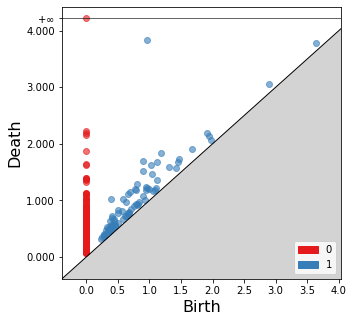

In [13]:
ph0 = np.load("lorenzshadow_vr_dim0.npy")
ph0 = [(0, (x[0], x[1])) for x in ph0]
ph1 = np.load("lorenzshadow_vr_dim1.npy")
ph1 = [(1, (x[0], x[1])) for x in ph1]
ph = ph1+ ph0
gd.plot_persistence_diagram(persistence = ph, legend = True)
plt.title("")
plt.show()